In [20]:
import cudf
import numpy as np
import sys
import os
import argparse
import pickle
import fnmatch
from tqdm import tqdm
import re
import itertools
import random
import argparse
import matplotlib.pyplot as plt
import pandas as pd 
import matplotlib.cm as cm

ROOTDIR = '/mindhive/evlab/u/Shared/Greta_Eghbal_manifolds/'
RESULTDIR = '/mindhive/evlab/u/Shared/Greta_Eghbal_manifolds/results'
model_identifier = 'linear_NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.000161_sigma=5.0_nfeat=936-train_test-fixed'
train_identifier = 'epochs-10_batch-32_lr-0.01_momentum-0.5_init-gaussian_std-1e-06'
analyze_identifier = 'mftma-exm_per_class=50-proj=False-rand=True-kappa=1e-08-n_t=300-n_rep=5'

## Helper functions ##
#def moving_average(x, w):
#    return np.convolve(x, np.ones(w), 'valid') / w

def moving_average(x,w):
    w_min=1#int(np.floor(w/2))
    return pd.Series(x).rolling(w, min_periods=w_min).mean()
av_window=10

In [14]:
## SPECS ALL ##
#layers = ['layer_1_Linear', 'laxyer_2_Linear', 'layer_3_Linear'] # 'layer_0_Input'
layers = ['layer_1_Linear']
hier_idxs = np.arange(6)

for layer in layers:
    print(f'\n___________ Layer: {layer}____________')
    for hier_idx in hier_idxs:
        num_subsamples = 100
        k = 100
        # hier_idx = 5
        # layer = layers[0]
        mov_avg = 10 
        save_fig = True
        collapse_subsamples = True # whether to average across num_subsamples! currently both computed
        p_array = [5, 50, 95]

        knn_identifier = f'knn_k={k}_subsamples={num_subsamples}'
        pkl_name = f'layer={layer}_hier={hier_idx}.pkl'

        SAVEDIR = os.path.join(ROOTDIR, 'analyze', knn_identifier, model_identifier, train_identifier)
        PLOTDIR = os.path.join(ROOTDIR, 'results', knn_identifier, model_identifier, train_identifier)

        if not os.path.exists(PLOTDIR):
            os.makedirs(PLOTDIR)

        data = pickle.load(open(os.path.join(SAVEDIR+'/'+pkl_name),'rb'))

        D = data['D']
        I = data['I']
        I_stand = I/np.max(I)
        epochs = data['epochs']

        D_k_mean = np.mean(D,axis=1)
        D_k_mean_collapsed = np.mean(D_k_mean.reshape(-1, num_subsamples),axis=1)

        # analyses of fixed points and percentiles
        # compute percentiles
        p = np.percentile(I, p_array, axis=1)
        p_collapse = [np.mean(x.reshape(-1, num_subsamples),axis=1) for x in p]
        time_diag = np.arange(len(D_k_mean))
        time_diag_collapsed = np.arange(len(D_k_mean_collapsed))*100

        norms = np.zeros((k-1, I.shape[0]))
        for i in range(1, k):
            norms[i-1, :] = I[:, 0] - I[:, i] 

        mean_norms = np.mean(norms,axis=0)
        mean_k_norms = np.mean(norms,axis=1)
        # norms_mov_avg = (moving_average(abs(mean_norms), mov_avg))

        norms_collapsed = np.mean(mean_norms.reshape(-1, num_subsamples),axis=1)

        # norms_mov_avg = moving_average(abs(mean_norms), mov_avg)
        norms_mov_avg = moving_average(abs(mean_norms), mov_avg)
        norms_mov_avg_collapsed = moving_average(abs(norms_collapsed), mov_avg)
        fixed_point = np.argmin((norms_mov_avg))
        fixed_point_collapsed = np.argmin((norms_mov_avg_collapsed))
        print(f'Hierarchy {hier_idx}: Fixed point collapsed: {fixed_point_collapsed} | Fixed point: {fixed_point}')


___________ Layer: layer_1_Linear____________


FileNotFoundError: [Errno 2] No such file or directory: '/mindhive/evlab/u/Shared/Greta_Eghbal_manifolds/analyze/knn_k=100_subsamples=100/NN-tree_nclass=64_nobj=64000_nhier=6_beta=0.0923671_sigma=5.0_nfeat=936-train_test-fixed/epochs-10_batch-32_lr-0.01_momentum-0.5_init-gaussian_std-1e-06/layer=layer_1_Linear_hier=0.pkl'


___________ Layer: layer_1_Linear____________
Hierarchy 0: Fixed point collapsed: 284 | Fixed point: 1794


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 1: Fixed point collapsed: 280 | Fixed point: 1751


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 2: Fixed point collapsed: 285 | Fixed point: 1742


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 3: Fixed point collapsed: 285 | Fixed point: 1859


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 4: Fixed point collapsed: 216 | Fixed point: 1686


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 5: Fixed point collapsed: 283 | Fixed point: 1791

___________ Layer: layer_2_Linear____________


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 0: Fixed point collapsed: 189 | Fixed point: 18570


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 1: Fixed point collapsed: 187 | Fixed point: 17573


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 2: Fixed point collapsed: 189 | Fixed point: 18820


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 3: Fixed point collapsed: 189 | Fixed point: 18888


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 4: Fixed point collapsed: 189 | Fixed point: 18761


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 5: Fixed point collapsed: 185 | Fixed point: 18782

___________ Layer: layer_3_Linear____________


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 0: Fixed point collapsed: 0 | Fixed point: 16700


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 1: Fixed point collapsed: 0 | Fixed point: 16707


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 2: Fixed point collapsed: 0 | Fixed point: 4854


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 3: Fixed point collapsed: 0 | Fixed point: 8153


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 4: Fixed point collapsed: 0 | Fixed point: 16395


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


Hierarchy 5: Fixed point collapsed: 0 | Fixed point: 15854


/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: FixedFormatter should only be used together with FixedLocator
/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator


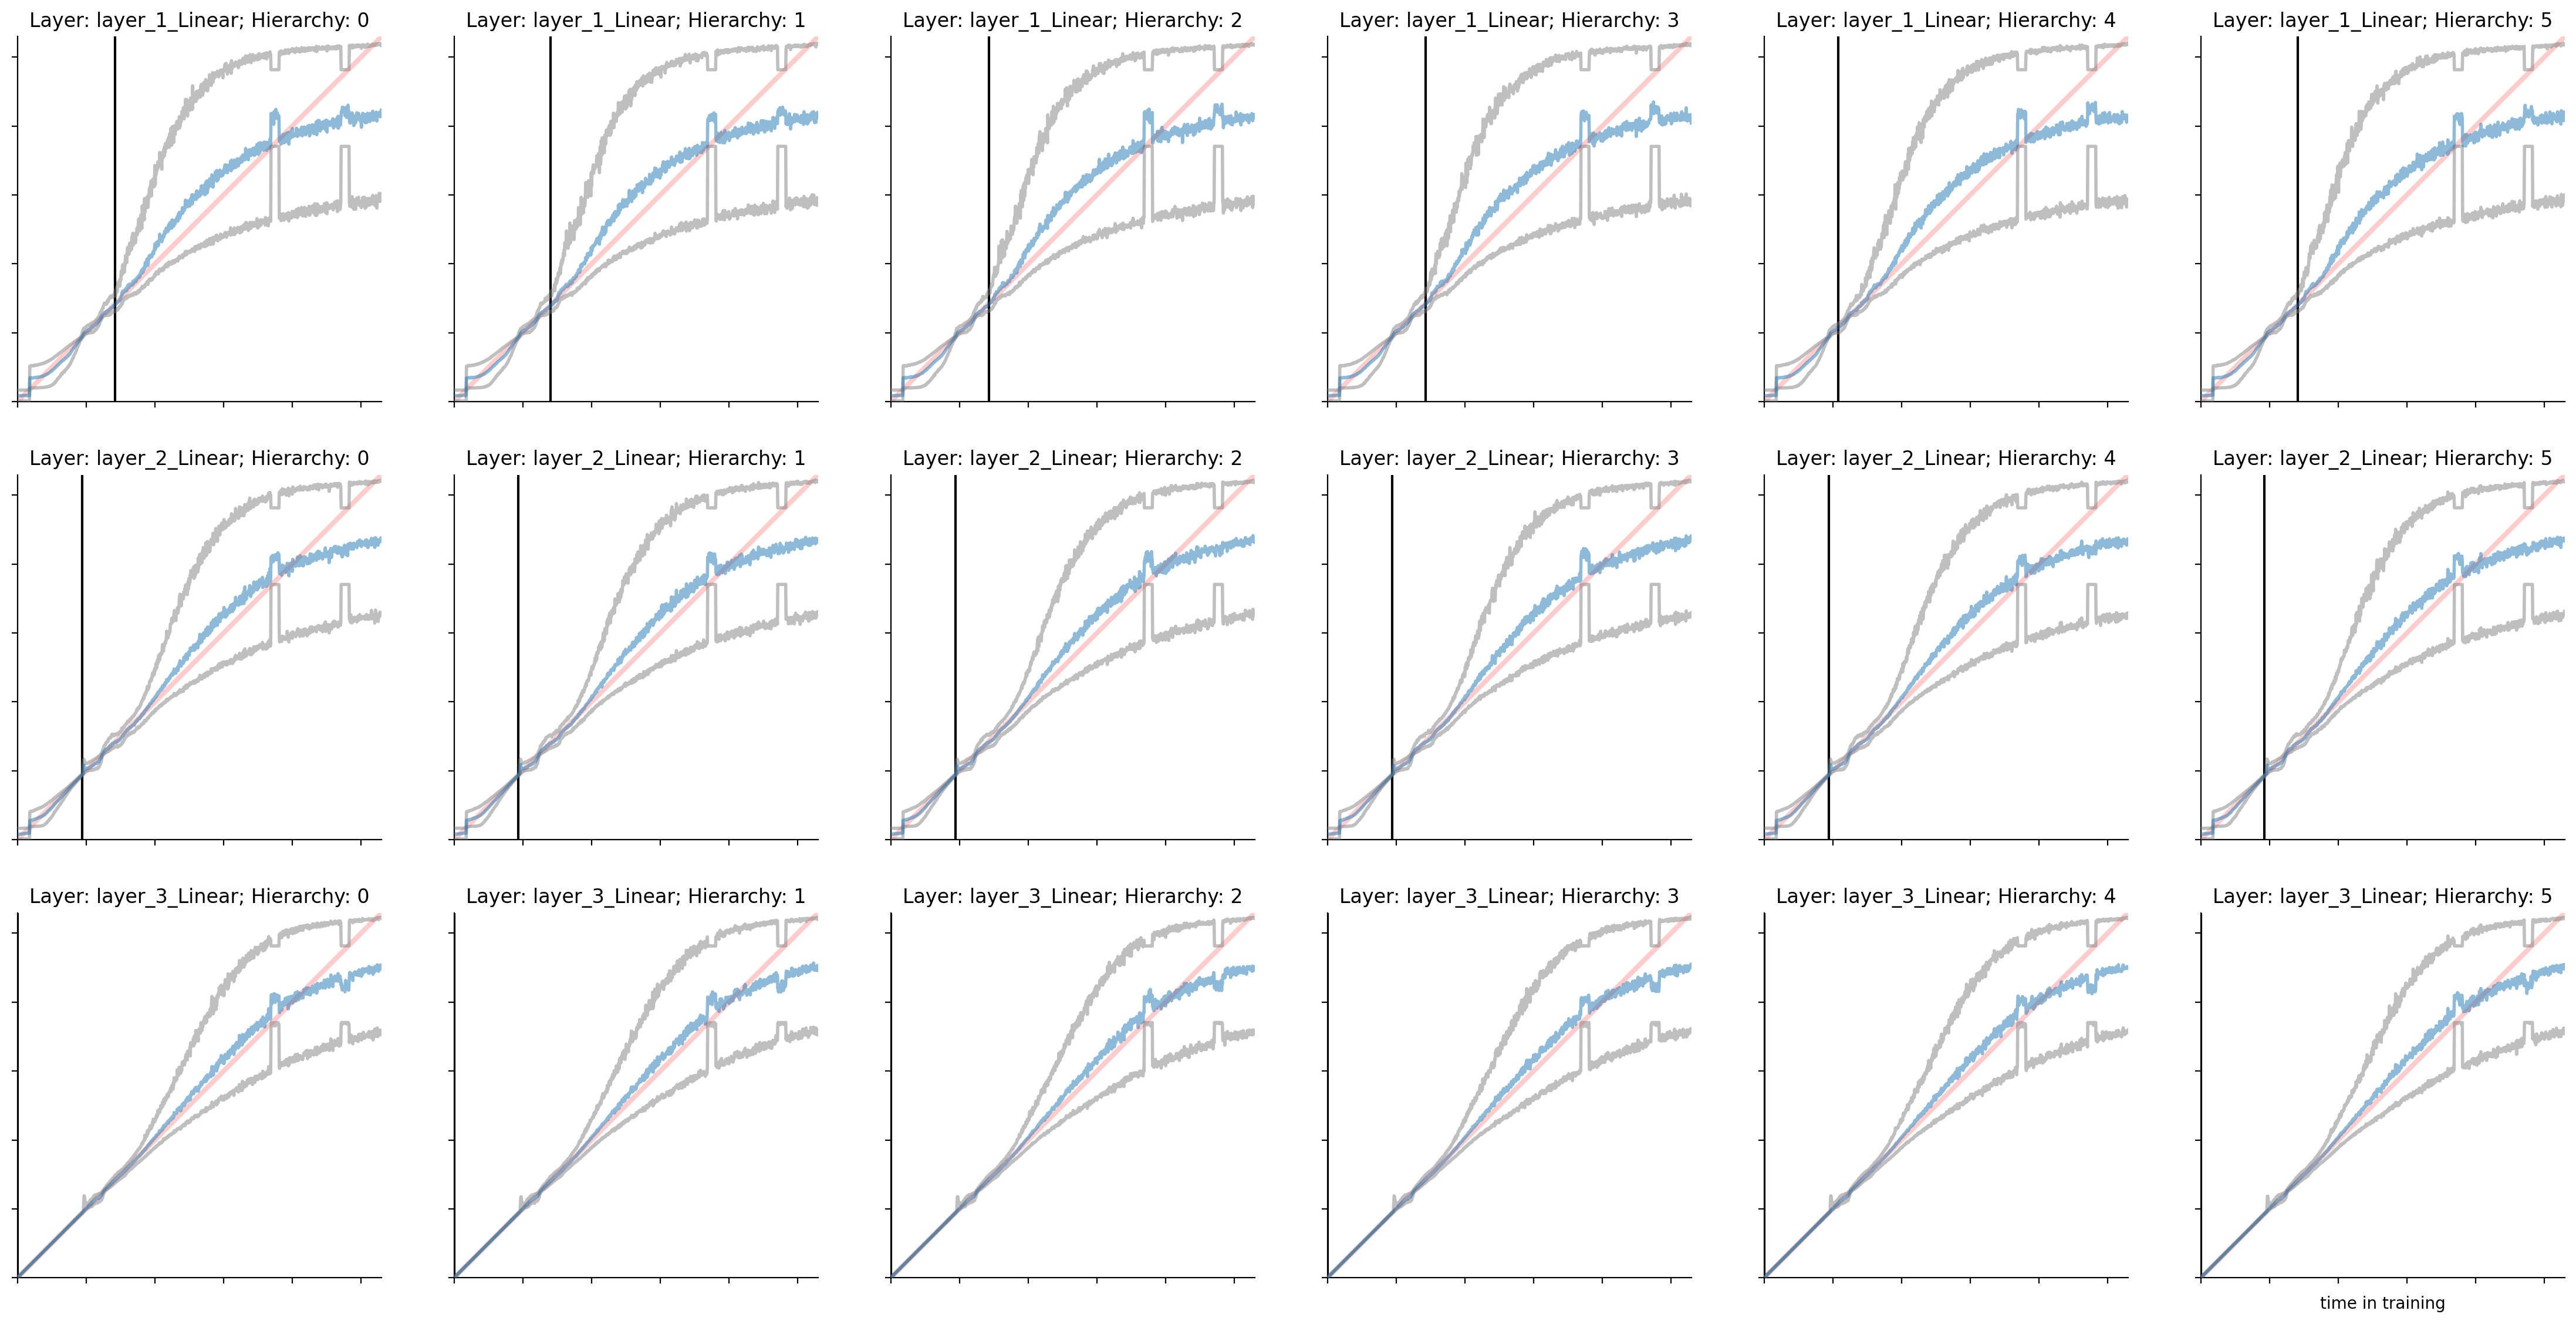

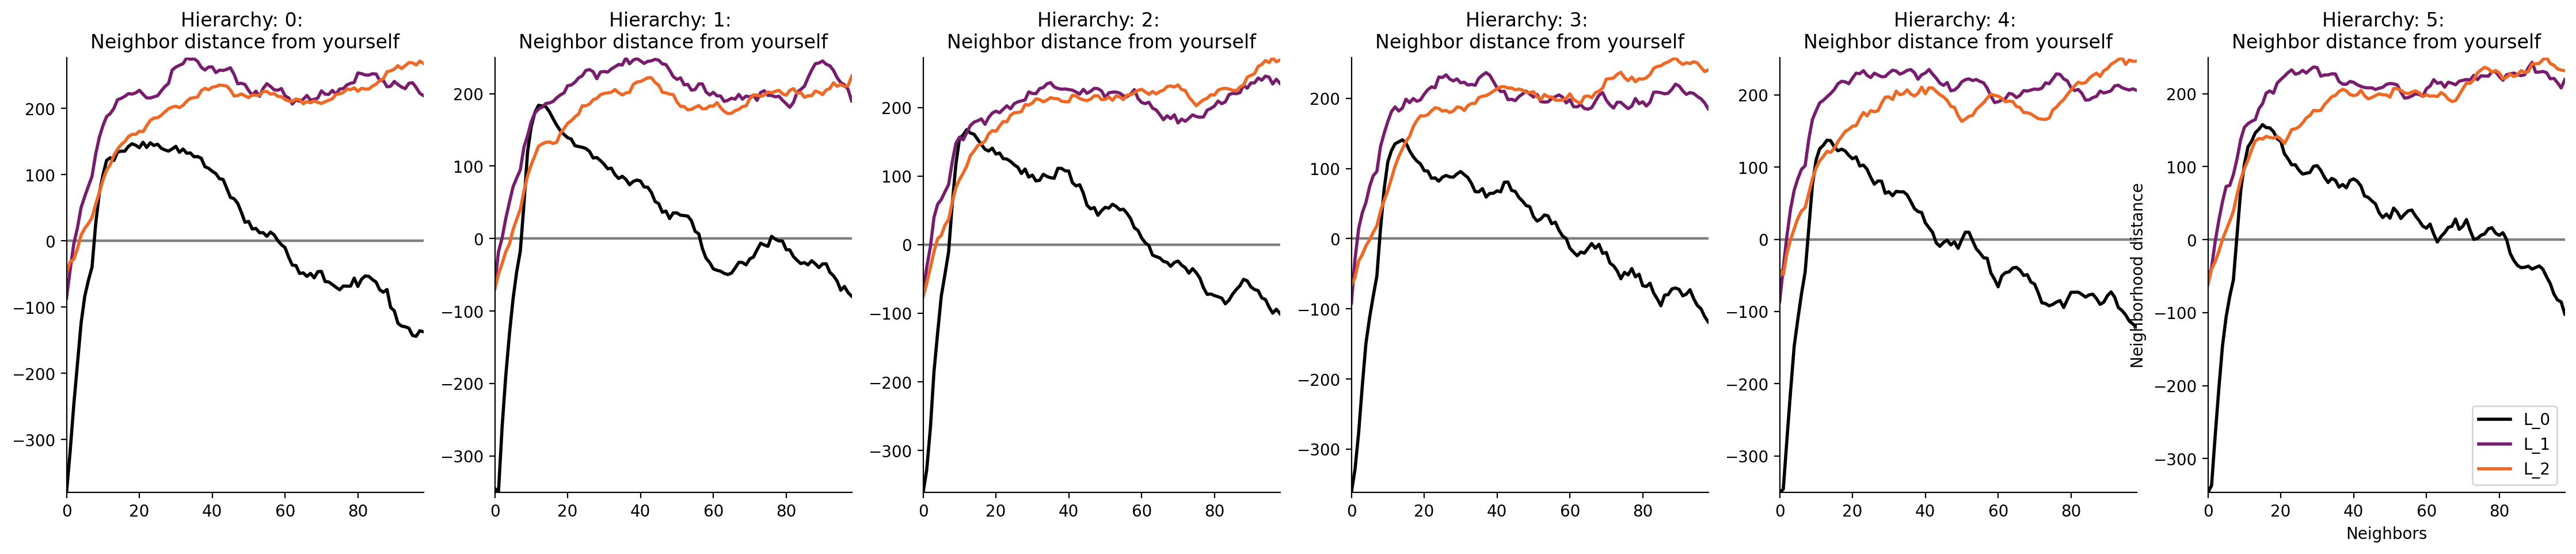

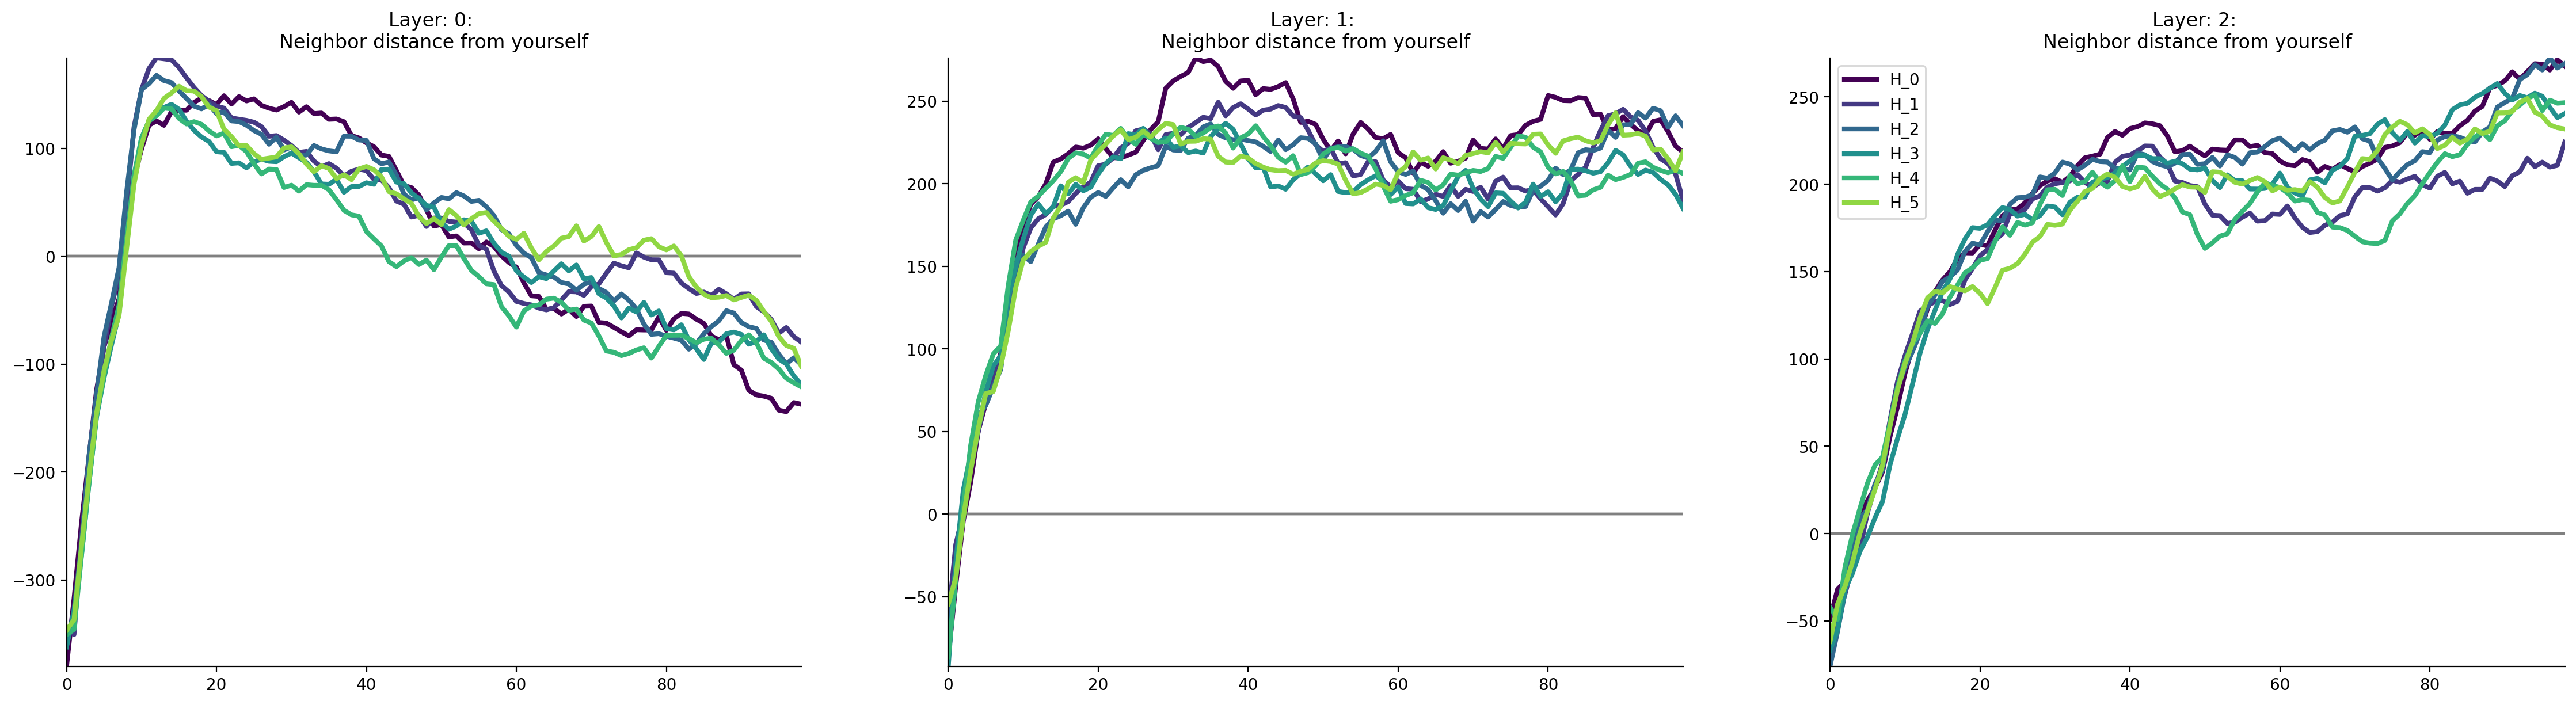

In [21]:
## INCLUDE PLOTS IN THE LOOP ##
## SPECS ALL ##
layers = ['layer_1_Linear', 'layer_2_Linear', 'layer_3_Linear'] # 'layer_0_Input'
#layers = ['layer_1_Linear']
hier_idxs = np.arange(6)
num_colors=len(layers)+1
h0=cm.get_cmap('inferno_r',num_colors)
layer_cols=np.flipud(h0(np.arange(num_colors)/num_colors))

num_colors=len(hier_idxs)+1
h0=cm.get_cmap('viridis_r',num_colors)
hier_cols=np.flipud(h0(np.arange(num_colors)/num_colors))

fig, axes = plt.subplots(3, 6, figsize=(28,14),dpi=200,frameon=False)
fig1, axes1 = plt.subplots(1, 6, figsize=(28,5),dpi=200,frameon=False)
fig2, axes2 = plt.subplots(1, 3, figsize=(28,7),dpi=200,frameon=False)

for row, layer in enumerate(layers):
    print(f'\n___________ Layer: {layer}____________')
    for hier_idx in hier_idxs:

        num_subsamples = 100
        k = 100
        # hier_idx = 5
        # layer = layers[0]
        mov_avg = 10 
        save_fig = True
        collapse_subsamples = True # whether to average across num_subsamples! currently both computed
        p_array = [5, 50, 95]

        knn_identifier = f'knn_k={k}_subsamples={num_subsamples}'
        pkl_name = f'layer={layer}_hier={hier_idx}_with_data.pkl'

        SAVEDIR = os.path.join(ROOTDIR, 'analyze', knn_identifier, model_identifier, train_identifier)
        PLOTDIR = os.path.join(ROOTDIR, 'results', knn_identifier, model_identifier, train_identifier)

        if not os.path.exists(PLOTDIR):
            os.makedirs(PLOTDIR)

        data = pickle.load(open(os.path.join(SAVEDIR+'/'+pkl_name),'rb'))

        D = data['D']
        I = data['I']
        I_stand = I/np.max(I)
        epochs = data['epochs']

        D_k_mean = np.mean(D,axis=1)
        D_k_mean_collapsed = np.mean(D_k_mean.reshape(-1, num_subsamples),axis=1)

        # analyses of fixed points and percentiles
        # compute percentiles
        p = np.percentile(I, p_array, axis=1)
        p_collapse = [np.mean(x.reshape(-1, num_subsamples),axis=1) for x in p]
        time_diag = np.arange(len(D_k_mean))
        time_diag_collapsed = np.arange(len(D_k_mean_collapsed))*100

        norms = np.zeros((k-1, I.shape[0]))
        for i in range(1, k):
            norms[i-1, :] = I[:, 0] - I[:, i] 

        mean_norms = np.mean(norms,axis=0)
        mean_k_norms = np.mean(norms,axis=1)
        # norms_mov_avg = (moving_average(abs(mean_norms), mov_avg))

        norms_collapsed = np.mean(mean_norms.reshape(-1, num_subsamples),axis=1)

        # norms_mov_avg = moving_average(abs(mean_norms), mov_avg)
        norms_mov_avg = moving_average(abs(mean_norms), mov_avg)
        norms_mov_avg_collapsed = moving_average(abs(norms_collapsed), mov_avg)
        fixed_point = np.argmin((norms_mov_avg))
        fixed_point_collapsed = np.argmin((norms_mov_avg_collapsed))
        print(f'Hierarchy {hier_idx}: Fixed point collapsed: {fixed_point_collapsed} | Fixed point: {fixed_point}')

        ## PLOTS ##
        alpha=0.5
        #plt.figure(figsize=(5,5))
        ax=axes[row,hier_idx]
        ax.plot(p_collapse[0], label=f'Percentile {p_array[0]}', alpha=alpha, color='grey',linewidth=2,zorder=5)
        ax.plot(p_collapse[1], label=f'Percentile {p_array[1]}', alpha=alpha,linewidth=2,zorder=10)
        ax.plot(p_collapse[2], label=f'Percentile {p_array[2]}', alpha=alpha, color='grey',linewidth=2,zorder=5)
        #ax1.set_xlabel('Time')
        ax.set_yticklabels([''])
        ax.set_xticklabels([''])
        ax.set_title(f'Layer: {layer}; Hierarchy: {hier_idx}')
        ax.plot(np.arange(len(p_collapse[0])), time_diag_collapsed,color=(1,.5,.5), label='Current pseudotime',linewidth=3,zorder=0,alpha=.4)
        ax.axvline(x=fixed_point_collapsed, label='Estimated fixed point', color='black',zorder=0)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.autoscale(enable=True, axis='x', tight=True)
        ax.autoscale(enable=True, axis='y', tight=True)
        #axes[row,hier_idx].plot(np.ravel([np.repeat(x,1) for x in data['test_accs']])*1060, label='Test accuracy', linewidth=0.6)
        #axes[row,hier_idx].legend()
        
#         alpha=0.5
#         ax1=axes1[row,hier_idx]
        
#         ax1.plot(p[0,:], label=f'Percentile {p_array[0]}', alpha=alpha, color='grey')
#         ax1.plot(p[1,:], label=f'Percentile {p_array[1]}', alpha=alpha)
#         ax1.plot(p[2,:], label=f'Percentile {p_array[2]}', alpha=alpha, color='grey')
#         ax1.set_xlabel('Time')
#         ax1.set_title(f'Layer: {layer}; Hierarchy: {hier_idx}: \nNeighborhood percentiles (not collapsed across subsamples)')
#         ax1.plot(time_diag, label='Current pseudotime')
#         ax1.axvline(x=fixed_point, label='Estimated fixed point', color='black')
#         ax1.plot(np.ravel([np.repeat(x,100) for x in data['test_accs']])*1060, label='Test accuracy', linewidth=0.6)
#         #ax1.legend()

#         plt.figure(figsize=(5,5))
        ax1=axes1[hier_idx]
        ax1.plot(moving_average(mean_k_norms,8),color=layer_cols[row,:],label=f"L_{row}",linewidth=2)
        ax1.set_title(f'Hierarchy: {hier_idx}: \nNeighbor distance from yourself')
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.autoscale(enable=True, axis='x', tight=True)
        ax1.autoscale(enable=True, axis='y', tight=True)
        ax1.axhline(y=0, color=(.5,.5,.5),zorder=0)
        
        ax2=axes2[row]
        ax2.plot(moving_average(mean_k_norms,8),color=hier_cols[hier_idx,:],label=f"H_{hier_idx}",linewidth=3)
        ax2.set_title(f'Layer: {row}: \nNeighbor distance from yourself')
        ax2.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.autoscale(enable=True, axis='x', tight=True)
        ax2.autoscale(enable=True, axis='y', tight=True)
        ax2.axhline(y=0, color=(.5,.5,.5),zorder=0)
#         plt.figure(figsize=(5,5))
#         plt.plot(D_k_mean, linewidth=0.8)
#         plt.title(f'Layer: {layer}; Hierarchy: {hier_idx}: \nDistance matrix from KNN (mean over neighbors)')
#         plt.xlabel('Time')
#         # plt.xticks(time_diag[0::100], [str(int(element/100)) for element in time_diag[0::100]])
#         if save_fig:
#             plt.savefig(os.path.join(PLOTDIR, f'dist-matrix_time-avg.pdf'), dpi=240)
#ax1.set_ylabel('feature norm')
ax.set_xlabel('time in training')
ax1.set_xlabel('Neighbors')
ax1.set_ylabel('Neighborhood distance')
ax1.legend()
ax2.legend()

if not os.path.exists(f'{RESULTDIR}/{train_identifier}'):
    os.makedirs(f'{RESULTDIR}/{train_identifier}')

fig.savefig(f'{RESULTDIR}/{train_identifier}/fig0_{model_identifier}.pdf')
fig1.savefig(f'{RESULTDIR}/{train_identifier}/fig1_{model_identifier}.pdf')
fig2.savefig(f'{RESULTDIR}/{train_identifier}/fig2_{model_identifier}.pdf')

In [5]:
row

0

Fixed point collapsed, hierarchy 2: 337


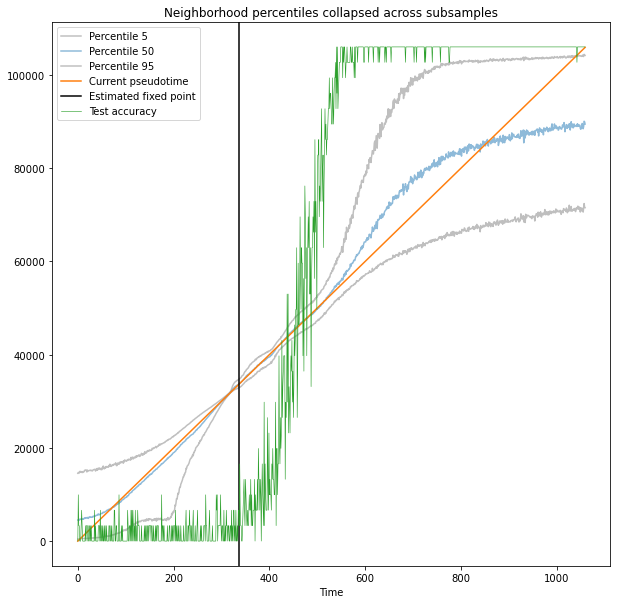

In [3]:
## RUN FOR JUST ONE SPECIFIC SPEC ##
num_subsamples = 100
k = 100
hier_idx = 2
layer = layers[0]
mov_avg = 10 
save_fig = True
collapse_subsamples = True # whether to average across num_subsamples! currently both computed
p_array = [5, 50, 95]

knn_identifier = f'knn_k={k}_subsamples={num_subsamples}'
pkl_name = f'layer={layer}_hier={hier_idx}.pkl'

SAVEDIR = os.path.join(ROOTDIR, 'analyze', knn_identifier, model_identifier, train_identifier)
PLOTDIR = os.path.join(ROOTDIR, 'results', knn_identifier, model_identifier, train_identifier)

if not os.path.exists(PLOTDIR):
    os.makedirs(PLOTDIR)

data = pickle.load(open(os.path.join(SAVEDIR+'/'+pkl_name),'rb'))

D = data['D']
I = data['I']
I_stand = I/np.max(I)
epochs = data['epochs']

D_k_mean = np.mean(D,axis=1)
D_k_mean_collapsed = np.mean(D_k_mean.reshape(-1, num_subsamples),axis=1)

# analyses of fixed points and percentiles
# compute percentiles
p = np.percentile(I, p_array, axis=1)
p_collapse = [np.mean(x.reshape(-1, num_subsamples),axis=1) for x in p]
time_diag = np.arange(len(D_k_mean))
time_diag_collapsed = np.arange(len(D_k_mean_collapsed))*100

norms = np.zeros((k-1, I.shape[0]))
for i in range(1, k):
    norms[i-1, :] = I[:, 0] - I[:, i] 

mean_norms = np.mean(norms,axis=0)
mean_k_norms = np.mean(norms,axis=1)
# norms_mov_avg = (moving_average(abs(mean_norms), mov_avg))

norms_collapsed = np.mean(mean_norms.reshape(-1, num_subsamples),axis=1)

# norms_mov_avg = moving_average(abs(mean_norms), mov_avg)
norms_mov_avg = moving_average(abs(mean_norms), mov_avg)
norms_mov_avg_collapsed = moving_average(abs(norms_collapsed), mov_avg)
fixed_point = np.argmin((norms_mov_avg))
fixed_point_collapsed = np.argmin((norms_mov_avg_collapsed))
print(f'Fixed point collapsed, hierarchy {hier_idx}: {fixed_point_collapsed}')

alpha=0.5
plt.figure(figsize=(10,10))
plt.plot(p_collapse[0], label=f'Percentile {p_array[0]}', alpha=alpha, color='grey')
plt.plot(p_collapse[1], label=f'Percentile {p_array[1]}', alpha=alpha)
plt.plot(p_collapse[2], label=f'Percentile {p_array[2]}', alpha=alpha, color='grey')
plt.xlabel('Time')
plt.title('Neighborhood percentiles collapsed across subsamples')
plt.plot(np.arange(len(p_collapse[0])), time_diag_collapsed, label='Current pseudotime')
plt.axvline(x=fixed_point_collapsed, label='Estimated fixed point', color='black')
plt.plot(np.ravel([np.repeat(x,1) for x in data['test_accs']])*1060, label='Test accuracy', linewidth=0.6)
plt.legend()

In [ ]:
# Investigate why fixed point "goes wrong"

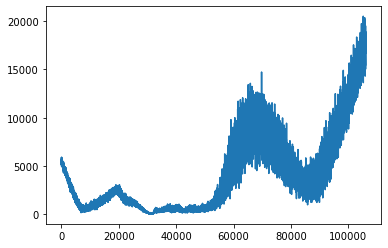

In [6]:
plt.plot(norms_mov_avg)

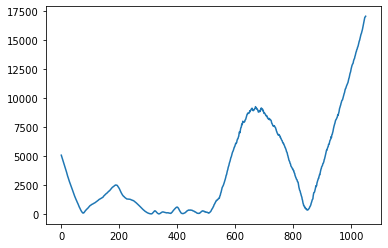

In [7]:
plt.plot(norms_mov_avg_collapsed)

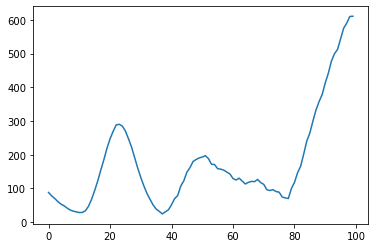

In [9]:
plt.plot(norms_mov_avg_collapsed[300:400])

In [8]:
np.argmin((norms_mov_avg_collapsed))

337

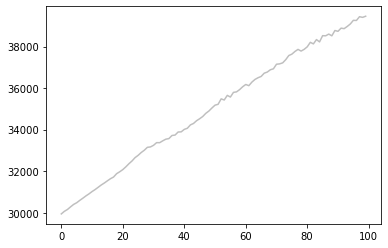

In [11]:
plt.plot(p_collapse[1][300:400], label=f'Percentile {p_array[0]}', alpha=alpha, color='grey')

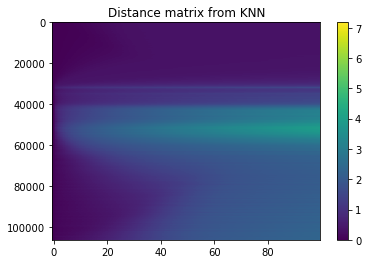

In [12]:
plt.imshow(D,aspect='auto',interpolation=None)
plt.title('Distance matrix from KNN')
plt.colorbar()

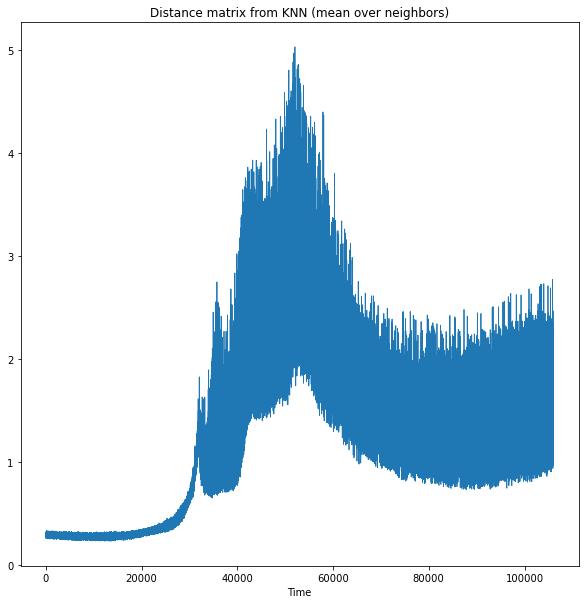

In [13]:
# for exploratory purposes...
plt.figure(figsize=(10,10))
plt.plot(D_k_mean, linewidth=0.8)
plt.title(f'Layer: {layer}; Hierarchy: {hier_idx}: \nDistance matrix from KNN (mean over neighbors)')
plt.xlabel('Time')
# plt.xticks(time_diag[0::100], [str(int(element/100)) for element in time_diag[0::100]])
if save_fig:
    plt.savefig(os.path.join(PLOTDIR, f'dist-matrix_time-avg.pdf'), dpi=240)

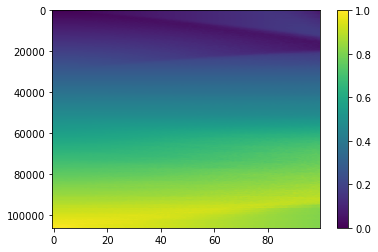

In [32]:
plt.imshow(I_stand,aspect='auto',interpolation=None)
plt.colorbar()

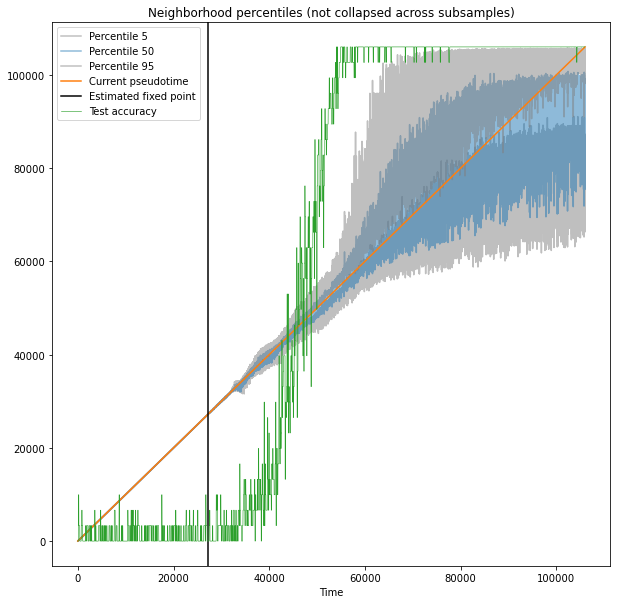

In [18]:
alpha=0.5
plt.figure(figsize=(10,10))
plt.plot(p[0,:], label=f'Percentile {p_array[0]}', alpha=alpha, color='grey')
plt.plot(p[1,:], label=f'Percentile {p_array[1]}', alpha=alpha)
plt.plot(p[2,:], label=f'Percentile {p_array[2]}', alpha=alpha, color='grey')
plt.xlabel('Time')
plt.title('Neighborhood percentiles (not collapsed across subsamples)')
plt.plot(time_diag, label='Current pseudotime')
plt.axvline(x=fixed_point, label='Estimated fixed point', color='black')
plt.plot(np.ravel([np.repeat(x,100) for x in data['test_accs']])*1060, label='Test accuracy', linewidth=0.6)
plt.legend()

Text(0, 0.5, 'Neighborhood distance')

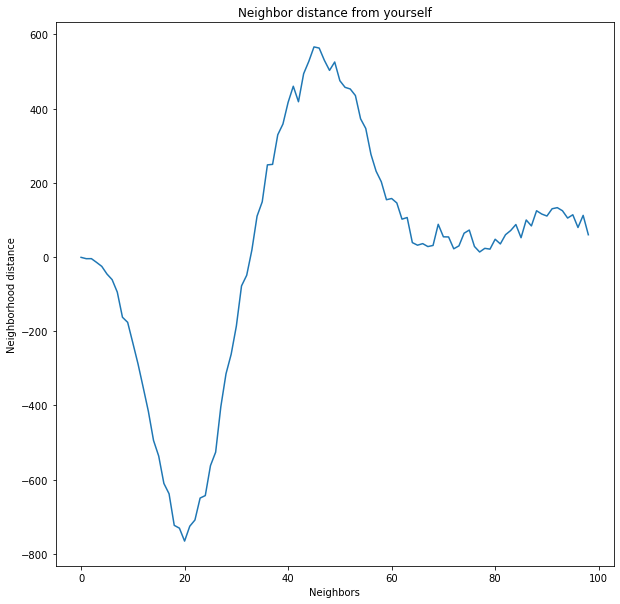